In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="You are using `torch.load` with `weights_only=False`")
warnings.filterwarnings("ignore", category=UserWarning, message="The PyTorch API of nested tensors is in prototype stage and will change in the near future.")

%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")
            
import torch
torch.set_printoptions(precision=10)


import yaml
torch.set_float32_matmul_precision('high')
from pathlib import Path

from rdkit import Chem
from rdkit.Chem import Draw
# load model 
from datasets.dataset_utils import  FP_Loader_Configer
fp_loader_configer = FP_Loader_Configer()

fp_loader_configer.select_version("DB_Specific")
fp_loader = fp_loader_configer.fp_loader

import numpy as np 
import random
seed=2
torch.cuda.manual_seed_all(seed) 
np.random.seed(seed)
random.seed(seed)



choosing DB_Specific_FP_loader


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/count_fragments_radius_under_10.pkl'

In [2]:
import pickle
with open(f'/root/gurusmart/MorganFP_prediction/inference_data/coconut_loutus_hyun_training/inference_metadata_latest_RDkit.pkl', 'rb') as file:
    smiles_and_names = pickle.load(file)
print(len(smiles_and_names))

526316


In [3]:
from inference.inference_utils import choose_model
from inference.inference_utils import save_molecule_inference
from inference.inference_utils import retrieve_top_k_by_rankingset, compute_cos_sim, unpack_inputs_no_delimiter, build_input, inference_topK
from utils.get_NP_class import get_superclass_and_glycoside

In [ ]:
#### For infrastructure, 
#### run this:
# hparams, model  = choose_model_DB_specific_FP("C-NMR", include_test_loader = False)


hparams, model, test_loader = choose_model("C-NMR", "DB_Specific", return_test_loader=True,)

max_radius = fp_loader.max_radius




loading /root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/non_collision_FP_rankingset_max_radius_6_dim_16384_stacked_together/FP.pt


/opt/conda/lib/python3.11/site-packages/torch/_utils.py:315: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  result = torch.sparse_compressed_tensor(
Initialized SignCoordinateEncoder[784] with dims [365, 365, 54] and 2 positional encoders. 54 bits are reserved for encoding the final bit


HsqcRankedTransformer saving args
finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=6


In [5]:
# fp_loader.setup(max_radius=6, out_dim = 16384)
# max_radius = fp_loader.max_radius
# hparams = {'out_dim': 16384}


In [6]:
rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/non_collision_FP_rankingset_max_radius_{max_radius}_dim_{hparams['out_dim']}_stacked_together/FP.pt"

rankingset_data = torch.load(rankingset_path)#.to("cuda")



In [7]:
rankingset_data = rankingset_data.to(model.device)
len(rankingset_data), len(smiles_and_names)

(526316, 526316)

############################################### compound number: 766##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.47269120812416077
Ground Truth NMR and structure


/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/dataset_utils.py:139: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


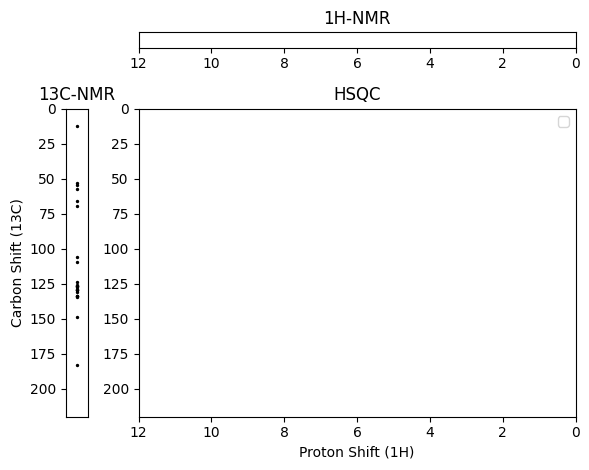

Ground truth chemical name Win-552122
Ground truth SMILES Cc1c(C(=O)c2cccc3ccccc23)c2cccc3c2n1C(CN1CCOCC1)CO3


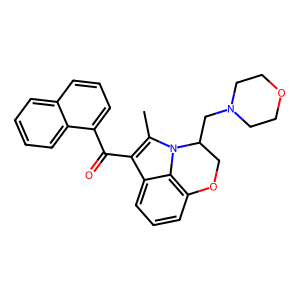

________retival #1, cosine similarity to prediction: 0.6049397587776184_________________
retrival is the same as ground truth: False
ground truth FP [[0], [1], [3], [4], [5], [10], [12], [13], [19], [20], [22], [29], [33], [46], [49], [62], [95], [102], [168], [171], [195], [202], [268], [296], [312], [368], [397], [428], [571], [620], [781], [841], [865], [1057], [1094], [1310], [1636], [1704], [1835], [2224], [2413], [2459], [2615], [2644], [2945], [3508], [3919], [4985], [11133]]
retrived FP [0.0, 0.16903084516525269, 0.0, 0.0, 0.16903084516525269, 0.16903084516525269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16903084516525269, 0.16903084516525269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16903084516525269, 0.16903084516525269, 0.16903084516525269, 0.16903084516525269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16903084516525269, 0.0, 0.16903084516525269, 0.0, 0.16903084516525269, 0.0, 0.0, 0.16903084516525269, 0.16903084516525269, 0.0, 0.16903084516525269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16903084516525269, 0.0, 0.0

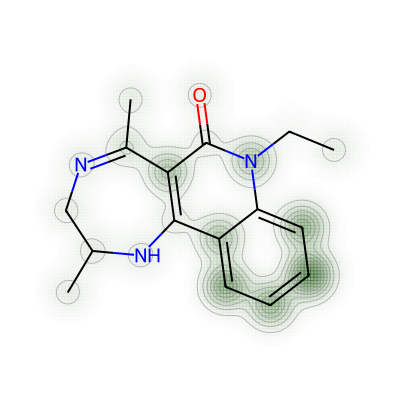

############################################### compound number: 853##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.4795067310333252
Ground Truth NMR and structure


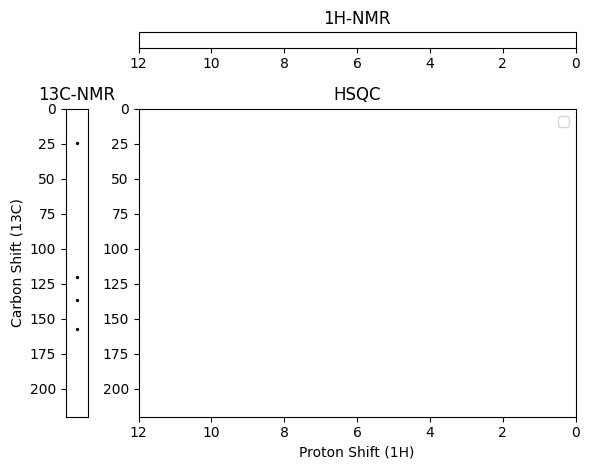

Ground truth chemical name 2,6-Dimethylpyridine
Ground truth SMILES Cc1cccc(C)n1


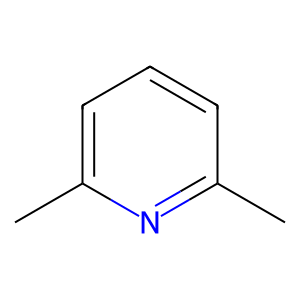

________retival #1, cosine similarity to prediction: 0.7130267024040222_________________
retrival is the same as ground truth: False
ground truth FP [[1], [13], [19], [29], [31], [49], [83], [102], [157], [195], [2492], [12838]]
retrived FP [0.0, 0.0, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26726123690605164, 0.26726123690605164, 0.0, 0.26726123690605164, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26726123690605164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

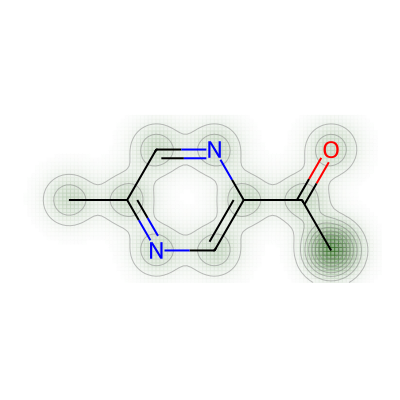

############################################### compound number: 859##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.2039685994386673
Ground Truth NMR and structure


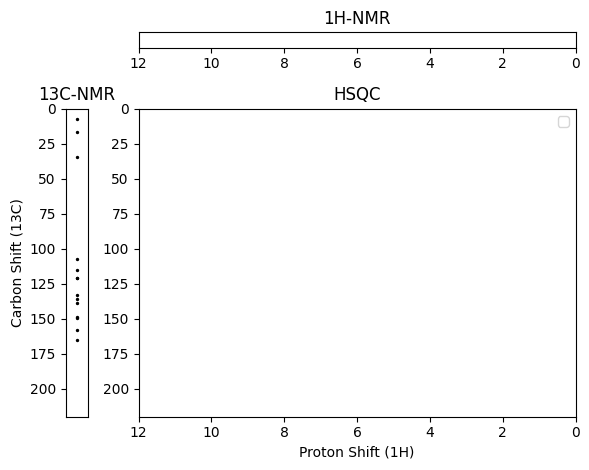

Ground truth chemical name Nevirapine (Viramune)
Ground truth SMILES Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1


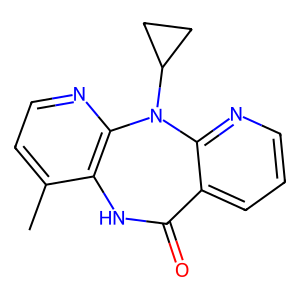

________retival #1, cosine similarity to prediction: 0.6372584104537964_________________
retrival is the same as ground truth: False
ground truth FP [[1], [4], [5], [11], [13], [14], [19], [20], [29], [31], [33], [36], [49], [175], [185], [195], [239], [279], [477], [670], [696], [898], [937], [1551], [2087], [2304], [7580], [13581]]
retrived FP [0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

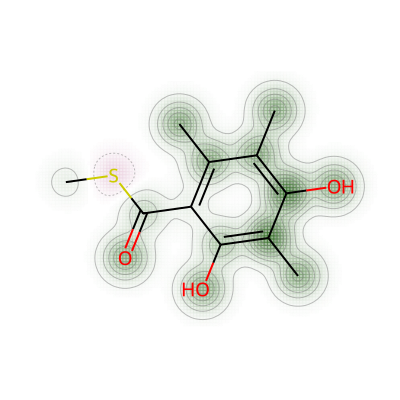

############################################### compound number: 871##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.25047364830970764
Ground Truth NMR and structure


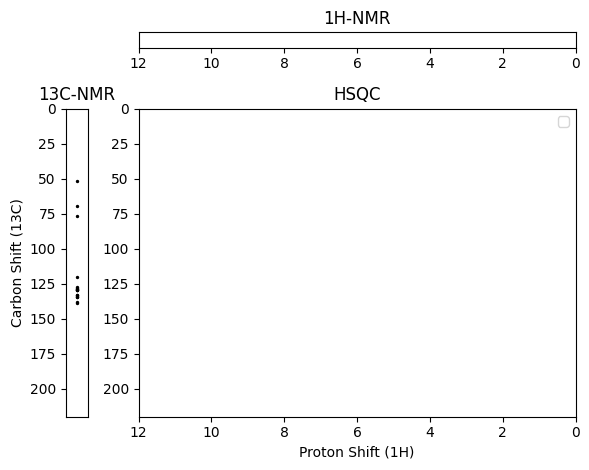

Ground truth chemical name Miconazole (Monistat)
Ground truth SMILES Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1


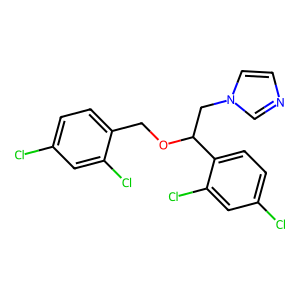

________retival #1, cosine similarity to prediction: 0.7415646314620972_________________
retrival is the same as ground truth: False
ground truth FP [[1], [2], [8], [9], [12], [19], [20], [29], [31], [156], [223], [239], [278], [423], [525], [601], [630], [634], [677], [822], [924], [1102], [1471], [2537], [4097], [4134], [5046], [5104], [5110], [6047], [6160], [10660], [11935], [11936], [11937]]
retrived FP [0.0, 0.3162277638912201, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.3162277638912201, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

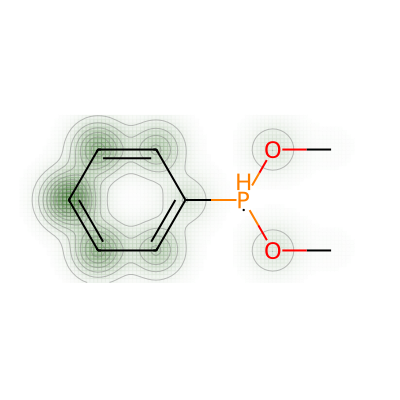

############################################### compound number: 889##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.46766942739486694
Ground Truth NMR and structure


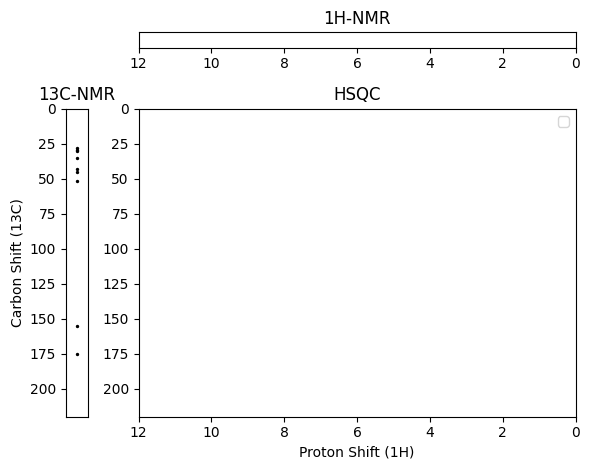

Ground truth chemical name (1R,3S)-Amidinomycin
Ground truth SMILES N=C(N)CCNC(=O)C1CCC(N)C1


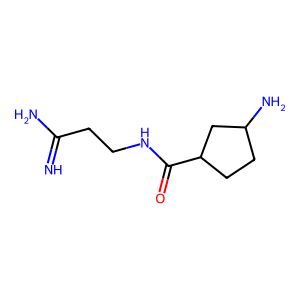

________retival #1, cosine similarity to prediction: 0.7165764570236206_________________
retrival is the same as ground truth: False
ground truth FP [[3], [4], [5], [10], [12], [14], [24], [32], [33], [35], [72], [112], [215], [301], [470], [471], [605], [642], [1223], [3034], [4154], [5342], [5513]]
retrived FP [0.0, 0.0, 0.0, 0.0, 0.25819888710975647, 0.25819888710975647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25819888710975647, 0.0, 0.0, 0.25819888710975647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25819888710975647, 0.0, 0.0, 0.0, 0.25819888710975647, 0.0, 0.25819888710975647, 0.25819888710975647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

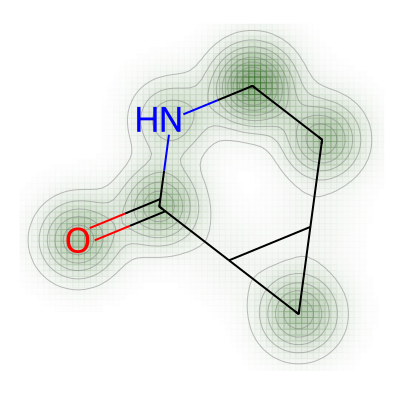

############################################### compound number: 924##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.4234941005706787
Ground Truth NMR and structure


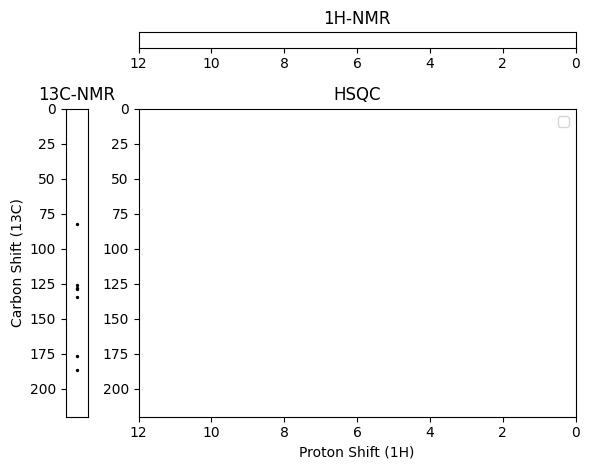

Ground truth chemical name "2-amino-5-phenyl-1,3-oxazol-4-one"
Ground truth SMILES NC1=NC(=O)C(c2ccccc2)O1


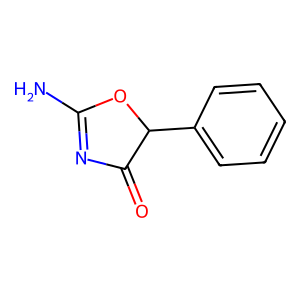

________retival #1, cosine similarity to prediction: 0.8088162541389465_________________
retrival is the same as ground truth: False
ground truth FP [[0], [1], [5], [11], [13], [19], [22], [29], [31], [33], [53], [54], [72], [100], [173], [675], [1187], [1267], [1691]]
retrived FP [0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.3162277638912201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

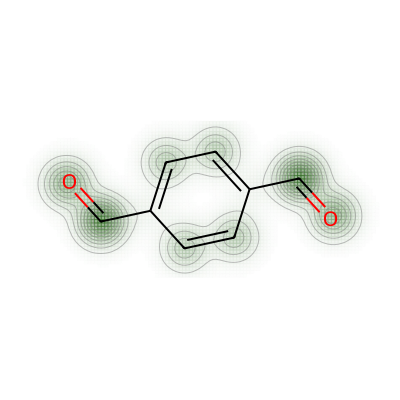

############################################### compound number: 942##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.3069066107273102
Ground Truth NMR and structure


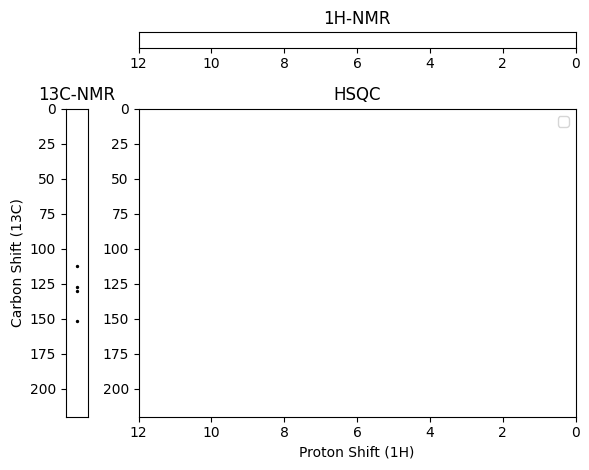

Ground truth chemical name Sulfanilamide
Ground truth SMILES Nc1ccc(S(N)(=O)=O)cc1


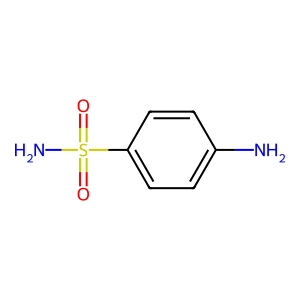

________retival #1, cosine similarity to prediction: 0.7581354975700378_________________
retrival is the same as ground truth: False
ground truth FP [[1], [19], [29], [33], [72], [335], [337], [426], [904], [1202], [3645], [5826], [9639], [9729], [11423], [13992]]
retrived FP [0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28867512941360474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

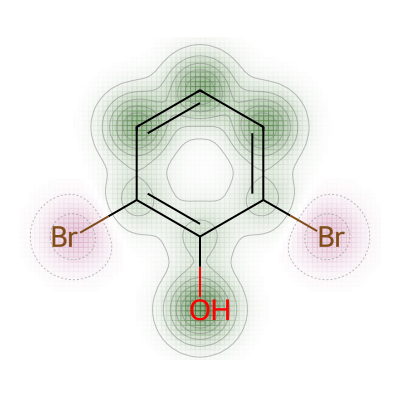

############################################### compound number: 1088##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.41688159108161926
Ground Truth NMR and structure


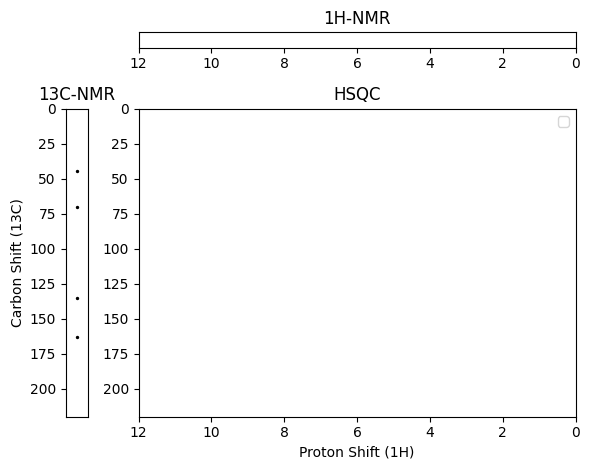

Ground truth chemical name 59995-47-0
Ground truth SMILES O=C1C=CC(O)C1


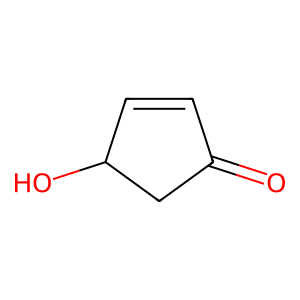

________retival #1, cosine similarity to prediction: 0.6920311450958252_________________
retrival is the same as ground truth: False
ground truth FP [[4], [5], [6], [11], [16], [19], [29], [33], [76], [225], [394], [1477], [2337]]
retrived FP [0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333432674408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

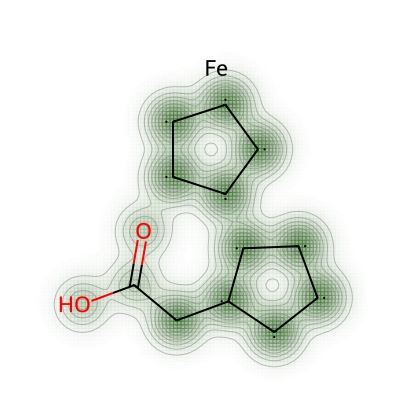

############################################### compound number: 1122##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.45484310388565063
Ground Truth NMR and structure


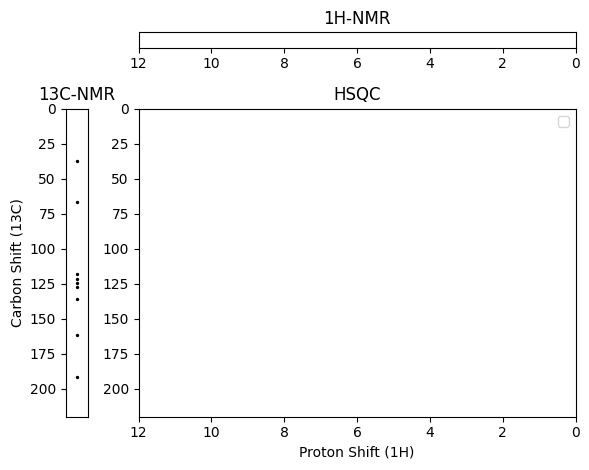

Ground truth chemical name 4-chromanone
Ground truth SMILES O=C1CCOc2ccccc21


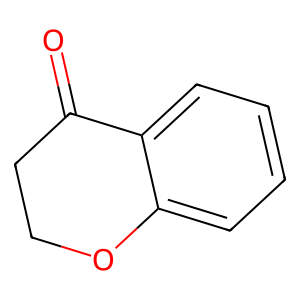

________retival #1, cosine similarity to prediction: 0.7246006727218628_________________
retrival is the same as ground truth: False
ground truth FP [[0], [1], [4], [11], [13], [19], [22], [29], [33], [85], [95], [175], [296], [368], [477], [655], [1137], [1636], [1744], [2260]]
retrived FP [0.0, 0.2182178795337677, 0.0, 0.0, 0.2182178795337677, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2182178795337677, 0.0, 0.0, 0.

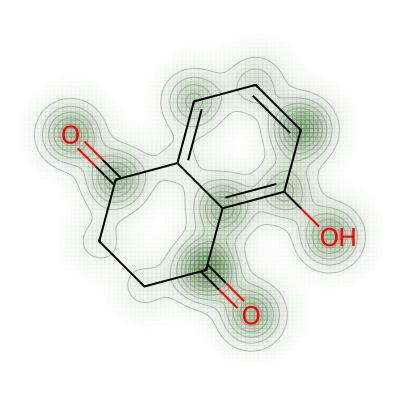

In [ ]:
'''
show some examples from my dataset to check sanity
for a single model, show top-5
'''
from datasets.dataset_utils import  plot_NMR
from inference.inference_utils import show_retrieved_mol_with_highlighted_frags

# model.to("cuda")
# for  which_compound in  random.sample(range(len(loader_all_inputs.dataset)), k=1):# range(0, 1):  
for which_compound in range(4000):    
    
    for idx, batch in enumerate(test_loader):
        if idx < which_compound:
            continue
        inputs, extra_info = batch
        (smiles, names, NMR_type_indicator, path, superclasses) = zip(*extra_info)
        # print(inputs.shape, inputs)
        # print(inputs, smiles_chemical_name)
        
        # batch[0] = batch[0].to("cuda")
        hsqc, c_tensor, h_tensor = unpack_inputs_no_delimiter(inputs[0], NMR_type_indicator[0])
  
        inputs = inputs.to(model.device)
        NMR_type_indicator = NMR_type_indicator[0].to(model.device)
        pred = model(inputs, NMR_type_indicator)
        pred=torch.sigmoid(pred) # sigmoid
        pred_FP = torch.where(pred.squeeze()>0.5, 1, 0)
        # print(pred_FP.nonzero().squeeze().tolist())
        break
    # print(f"dataloader: {loader_all_inputs.dataset.latest_element_got}")
    
    ground_truth_FP = fp_loader.build_mfp_for_new_SMILES(smiles[0])
    cos_ground_and_pred = compute_cos_sim(ground_truth_FP, pred.squeeze().float().to(ground_truth_FP.device)).item()
    if cos_ground_and_pred < 1/2:
        print(f"############################################### compound number: {which_compound+1}##############################################################")
        print("Ground truth cosine similarity to prediction(floating point number after sigmoid): ", cos_ground_and_pred)
        # print(inputs)
        
        print("Ground Truth NMR and structure")
        plot_NMR(hsqc, c_tensor, h_tensor)
        

        # # ground truth
        mol = Chem.MolFromSmiles(smiles[0])
        # mol = Chem.AddHs(mol)
        print(f"Ground truth chemical name {names[0]}")
        print(f"Ground truth SMILES {smiles[0]}")
        # print(f"Ground truth NMR path {path[0]}")
        img = Draw.MolToImage(mol, size=(300, 300))
        img.show()
        
        
        topk = retrieve_top_k_by_rankingset(rankingset_data, pred, smiles_and_names, k=1)
        i=0
        for value, (smile, name, _, _), retrieved_FP in topk:
            print(f"________retival #{i+1}, cosine similarity to prediction: {value.item()}_________________")
            print(f"retrival is the same as ground truth: {smile == smiles[0]}")
            print("ground truth FP", ground_truth_FP.nonzero().tolist())
            # print("retrived FP", retrieved_FP.nonzero().tolist())
            print("retrived FP", retrieved_FP.to_dense().squeeze().tolist())
            mol = Chem.MolFromSmiles(smile)

            print(f"SMILES: {smile}") 
            print(f"Name {name}")
            # img = Draw.MolToImage(mol)
            # img.show()
            img = show_retrieved_mol_with_highlighted_frags(pred_FP, smile)
            img.show()
            i+=1
        
print("DONE\n\n\n\n")
        



In [ ]:
hsqc, c_tensor, h_tensor

(None,
 tensor([ 33.9000015259,  99.2799987793,  35.6500015259,  37.2500000000,
         102.9400024414,  24.7700004578,  40.4000015259, 105.2500000000,
          77.4800033569,  46.9500007629,  49.7500000000,  18.8700008392,
          19.4500007629,  54.7400016785,  24.9799995422,  24.6299991608]),
 None)

In [ ]:
extra_info

[['COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3',
  'Artemether (SM-224)',
  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]),
  '/workspace/SMILES_dataset/test/oneD_NMR/10021.pt',
  ['Sesquiterpenoids']]]

In [ ]:
inputs

tensor([[[ 33.9000015259,   0.0000000000,   0.0000000000],
         [ 99.2799987793,   0.0000000000,   0.0000000000],
         [ 35.6500015259,   0.0000000000,   0.0000000000],
         [ 37.2500000000,   0.0000000000,   0.0000000000],
         [102.9400024414,   0.0000000000,   0.0000000000],
         [ 24.7700004578,   0.0000000000,   0.0000000000],
         [ 40.4000015259,   0.0000000000,   0.0000000000],
         [105.2500000000,   0.0000000000,   0.0000000000],
         [ 77.4800033569,   0.0000000000,   0.0000000000],
         [ 46.9500007629,   0.0000000000,   0.0000000000],
         [ 49.7500000000,   0.0000000000,   0.0000000000],
         [ 18.8700008392,   0.0000000000,   0.0000000000],
         [ 19.4500007629,   0.0000000000,   0.0000000000],
         [ 54.7400016785,   0.0000000000,   0.0000000000],
         [ 24.9799995422,   0.0000000000,   0.0000000000],
         [ 24.6299991608,   0.0000000000,   0.0000000000],
         [298.1780090332,   0.0000000000,   0.0000000000

In [ ]:
"""
Start  unkown compound
"""

'\nStart  unkown compound\n'

In [ ]:
# look for the higher cos_sim possible in our dataset
def retrieve_based_on_groudth(groud_truth_FP, k=5):
    topk = retrieve_top_k_by_rankingset(rankingset_data, groud_truth_FP, smiles_and_names, k=k) 
    
    i=0
    for ite, (value, (smile, name, _, _), retrieved_FP) in enumerate(topk):
        print(f"retival #{i+1}, cosine similarity between retrieval and ground truth: {value.item()}_____________________________")
        mol = Chem.MolFromSmiles(smile)
        print("retrived FP", retrieved_FP.to_dense().squeeze().tolist())
        print(f"SMILES: {smile}")
        print(f"Name {name}")
        #check is path file exists
        # plot_NMR(hsqc, c_tensor, h_tensor)
        img = Draw.MolToImage(mol)
        display(img)
        i+=1

In [ ]:
# rankingset_data = rankingset_data.to("cuda")

In [ ]:

# from notebook_and_scripts.SMILES_fragmenting.build_dataset_specific_FP.find_frags import count_circular_substructures


In [ ]:
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"
Kavaratamide_A_FP = fp_loader.build_mfp_for_new_SMILES(Kavaratamide_A_SMILES)


# Kavaratamide_A_bit_infos = count_circular_substructures(Kavaratamide_A_SMILES)

In [ ]:
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

Kavaratamide_A


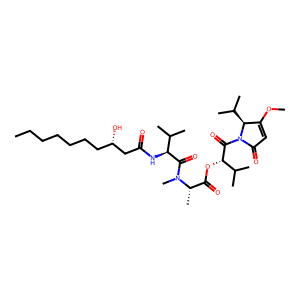

In [ ]:
print("Kavaratamide_A")
mol = Chem.MolFromSmiles(Kavaratamide_A_SMILES)
img = Draw.MolToImage(mol)
img

In [ ]:
# s2 = "CCCCCCC(O)CC(=O)NC1CCOC1=O"
# s2_FP = fp_loader.build_mfp_for_new_SMILES(s2)
# s2_FP.nonzero().sum(), Kavaratamide_A_FP.nonzero().sum()

retival #1, cosine similarity between retrieval and ground truth: 0.7378648519515991_____________________________
retrived FP [0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0,

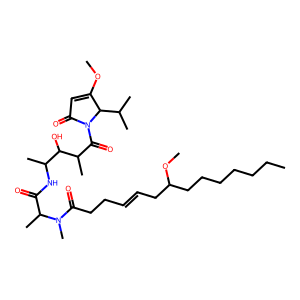

retival #2, cosine similarity between retrieval and ground truth: 0.6067880392074585_____________________________
retrived FP [0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.1714985966682434, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

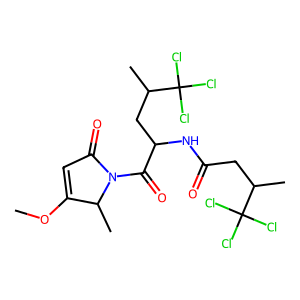

In [ ]:
retrieve_based_on_groudth(Kavaratamide_A_FP.unsqueeze(dim=0).to("cuda"), k=2)




Kavaratamide A


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.4026936293)



________retival #1, cosine similarity to prediction: 0.5591865181922913_________________
________retival's   cosine similarity to ground truth:  0.37463435530662537
SMILES: CCCC(NC(C)C(=O)O)C(=O)O
Name ['440979']


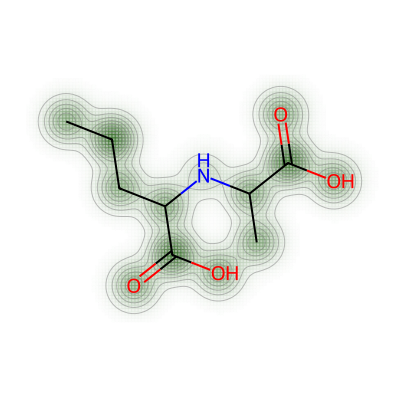

________retival #2, cosine similarity to prediction: 0.5461085438728333_________________
________retival's   cosine similarity to ground truth:  0.38103172183036804
SMILES: CCCCC(NC(C)=O)C(=O)O
Name ['N-acetyl-DL-norleucine']


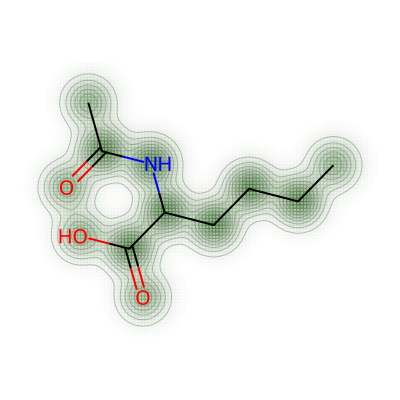

________retival #3, cosine similarity to prediction: 0.5422224402427673_________________
________retival's   cosine similarity to ground truth:  0.4645821452140808
SMILES: CCCCC(C)CC(C)C(=O)N(C)C(CC(C)C)C(=O)NC(C(=O)N(C)C(C(=O)N1CC(O)CC1C(=O)O)C(C)C)C(C)OC(C)=O
Name 139291861


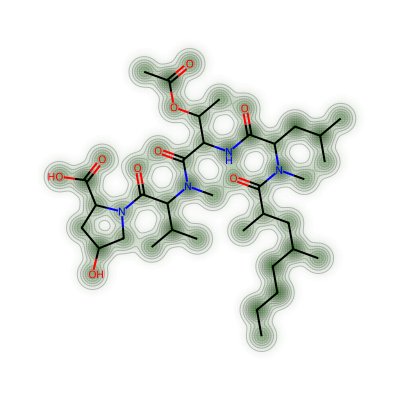

(['CCCC(NC(C)C(=O)O)C(=O)O',
  'CCCCC(NC(C)=O)C(=O)O',
  'CCCCC(C)CC(C)C(=O)N(C)C(CC(C)C)C(=O)NC(C(=O)N(C)C(C(=O)N1CC(O)CC1C(=O)O)C(C)C)C(C)OC(C)=O'],
 [['440979'], ['N-acetyl-DL-norleucine'], '139291861'])

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/Kavaratamide A"
mode = None#"flip_sign"
inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=Kavaratamide_A_FP,
                   fp_type = "DB_Specific_Radius", filter_by_MW="from_input",
                #    weight_pred = torch.tensor(-fp_loader.total_entropy_of_all_bits).to("cuda").float()
                )
                   

In [ ]:
Artemether_smiles = "COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3"
Artemether_ground_FP = fp_loader.build_mfp_for_new_SMILES(Artemether_smiles)




Artemether-(SM-224)


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.9819805622)



________retival #1, cosine similarity to prediction: 0.9861184358596802_________________
________retival's   cosine similarity to ground truth:  1.0
SMILES: COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3
Name Artemether


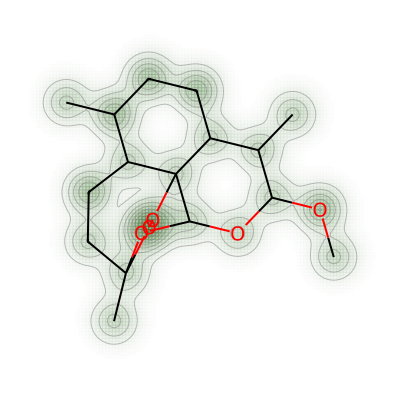

________retival #2, cosine similarity to prediction: 0.8623391389846802_________________
________retival's   cosine similarity to ground truth:  0.8467803597450256
SMILES: CC1CCC2C(C)C(O)OC3OC4(C)CCC1C32OO4
Name 1,5,9-Trimethyl-11,14,15,16-tetraoxatetracyclo[10.3.1.0~4,13~.0~8,13~]hexadecan-10-ol


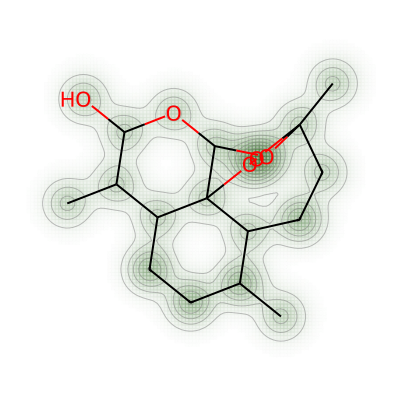

________retival #3, cosine similarity to prediction: 0.8457202911376953_________________
________retival's   cosine similarity to ground truth:  0.8576900362968445
SMILES: CCOC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3
Name 3000469


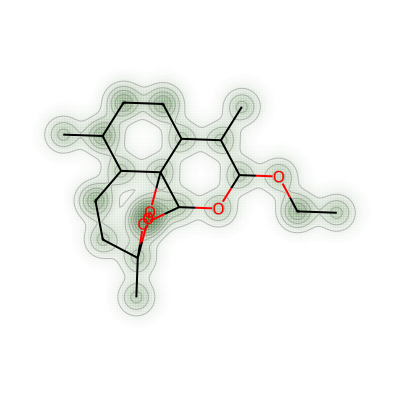

(['COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3',
  'CC1CCC2C(C)C(O)OC3OC4(C)CCC1C32OO4',
  'CCOC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3'],
 ['Artemether',
  '1,5,9-Trimethyl-11,14,15,16-tetraoxatetracyclo[10.3.1.0~4,13~.0~8,13~]hexadecan-10-ol',
  '3000469'])

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/Artemether-(SM-224)"
mode = None#"flip_sign"
inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=Artemether_ground_FP,
                   fp_type = "DB_Specific_Radius", filter_by_MW="from_input",
                #    weight_pred = torch.tensor(-fp_loader.total_entropy_of_all_bits).to("cuda").float()
                )
                   

In [ ]:
def investigate_new_molecule(compound_dir, SMILES):
    return
    mode = None#"flip_sign"

    # for model_type in ["only_1d_DTD", "only_C-NMR_DTD"]:
    for model_type in ['All-NMR', 'HSQC', 'C-NMR', 'H-NMR', 'HSQC_C-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"]:
    # for model_type in ['All-NMR']:
    # for model_type in ['C-NMR', ]:
        
        kwargs = {
            "include_h_nmr" : model_type in ['All-NMR', 'H-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD"],
            "include_c_nmr" : model_type in ['All-NMR', 'C-NMR', 'HSQC_C-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"],
            "include_hsqc" : model_type in ['All-NMR', 'HSQC', 'HSQC_C-NMR', 'HSQC_H-NMR', ]
        }
        
        inputs, NMR_type_indicator = build_input(compound_dir, mode=mode, **kwargs)
        
        hparams, model, test_loader = choose_model_DB_specific_FP(model_type)
        max_radius = fp_loader.max_radius
        print(f"Model type: {model_type}, max_radius: {max_radius}")
        rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/max_radius_{max_radius}_stacked_together_sparse/FP.pt"
        rankingset_data = torch.load(rankingset_path)#.to("cuda")
        
        save_molecule_inference(SMILES, compound_dir.split("/")[-1], None, model, model_type, inputs, NMR_type_indicator, rankingset_data, smiles_and_names)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/Kavaratamide A"
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"

investigate_new_molecule(compound_dir, Kavaratamide_A_SMILES)

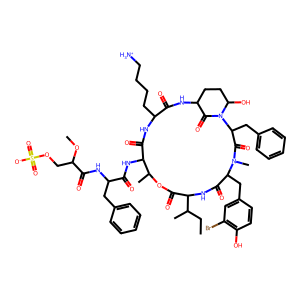

Error in O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O
Expecting value: line 1 column 1 (char 0)


(['unknown'], None)

In [ ]:
# retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=5)
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
Draw.MolToImage(Chem.MolFromSmiles(newCompoundA_SMILES)).show()
get_superclass_and_glycoside(newCompoundA_SMILES)

In [ ]:
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

retival #1, cosine similarity between retrieval and ground truth: 0.8002593517303467_____________________________
retrived FP [0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.086386844515800

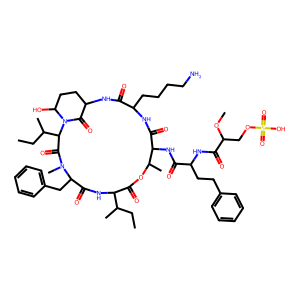

retival #2, cosine similarity between retrieval and ground truth: 0.7915244102478027_____________________________
retrived FP [0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

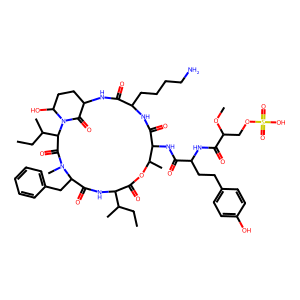

In [ ]:
retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=2)




new_compound_A


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.4715662599)



________retival #1, cosine similarity to prediction: 0.6009684801101685_________________
________retival's   cosine similarity to ground truth:  0.4220811724662781
SMILES: CC(C)CC1C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N(C)C(CC(C)C)C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N1C
Name "6,18-dibenzyl-3,9,15,21-tetraisobutyl-4,10,12,16,22,24-hexamethyl-1,7,13,19-tetraoxa-4,10,16,22-tetrazacyclotetracosane-2,5,8,11,14,17,20,23-octone"


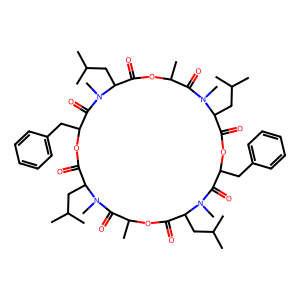

________retival #2, cosine similarity to prediction: 0.5935838222503662_________________
________retival's   cosine similarity to ground truth:  0.3600115478038788
SMILES: COC(=O)C1CC(C)N1C(=O)C(C(C)C)N(O)C(=O)C(CC(C)C)NC(=O)C1CC(OC(C)=O)C(C)N1C(=O)C(CC(C)C)NC(=O)C(NC(=O)C(O)=Cc1cc(Cl)c(OC)c(Cl)c1)C(C)O
Name Bonnevillamide A


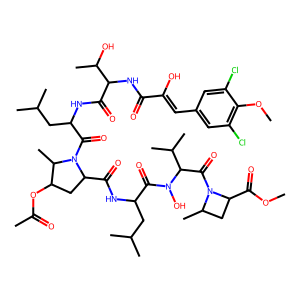

________retival #3, cosine similarity to prediction: 0.5861219763755798_________________
________retival's   cosine similarity to ground truth:  0.3896186053752899
SMILES: CCC(C)C1C(=O)N(C)C(C(C)CC)C(=O)NCC(=O)N(C)C(C(C)C)C(=O)NC(Cc2ccc(OC)cc2)C(=O)OC(C(C)C)C(=O)N2CCCCC2C(=O)N(C)C(C(C)C)C(=O)NC(CC(C)C)C(=O)N(C)C(CC(=O)O)C(=O)N1C
Name Clavariopsin I


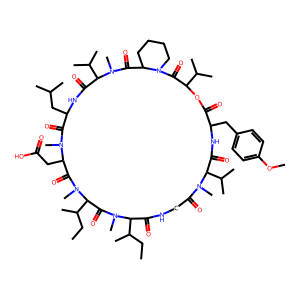

(['CC(C)CC1C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N(C)C(CC(C)C)C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N1C',
  'COC(=O)C1CC(C)N1C(=O)C(C(C)C)N(O)C(=O)C(CC(C)C)NC(=O)C1CC(OC(C)=O)C(C)N1C(=O)C(CC(C)C)NC(=O)C(NC(=O)C(O)=Cc1cc(Cl)c(OC)c(Cl)c1)C(C)O',
  'CCC(C)C1C(=O)N(C)C(C(C)CC)C(=O)NCC(=O)N(C)C(C(C)C)C(=O)NC(Cc2ccc(OC)cc2)C(=O)OC(C(C)C)C(=O)N2CCCCC2C(=O)N(C)C(C(C)C)C(=O)NC(CC(C)C)C(=O)N(C)C(CC(=O)O)C(=O)N1C'],
 ['"6,18-dibenzyl-3,9,15,21-tetraisobutyl-4,10,12,16,22,24-hexamethyl-1,7,13,19-tetraoxa-4,10,16,22-tetrazacyclotetracosane-2,5,8,11,14,17,20,23-octone"',
  'Bonnevillamide A',
  'Clavariopsin I'])

In [ ]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_A"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=newCompoundA_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_A"
investigate_new_molecule(compound_dir, newCompoundA_SMILES)




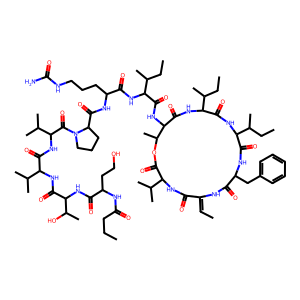

(['Oligopeptides'], False)

In [35]:
new_compoundB_smiles = "CCC(C1C(NC(C(C)CC)C(NC(CC2=CC=CC=C2)C(N/C(C(NC(C(C)C)C(OC(C)C(NC(C(NC(C(NC(C3CCCN3C(C(NC(C(NC(C(NC(C(NC(CCC)=O)CCO)=O)C(O)C)=O)C(C)C)=O)C(C)C)=O)=O)CCCNC(N)=O)=O)C(CC)C)=O)C(N1)=O)=O)=O)=C\C)=O)=O)=O)C"
Draw.MolToImage(Chem.MolFromSmiles(new_compoundB_smiles)).show()
get_superclass_and_glycoside(new_compoundB_smiles)

retival #1, cosine similarity between retrieval and ground truth: 0.9006819128990173_____________________________
retrived FP [0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356

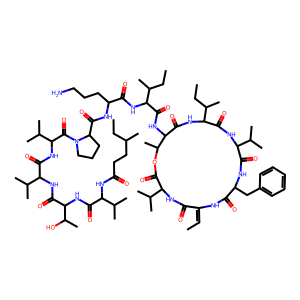

In [36]:
newCompoundB_FP = fp_loader.build_mfp_for_new_SMILES(new_compoundB_smiles)
retrieve_based_on_groudth(newCompoundB_FP.unsqueeze(dim=0).to("cuda"), k=1)

In [ ]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B1"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=2, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")




new_compound_B1


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.3507584631)





([], [])




new_compound_B2


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.7694178224)



________retival #1, cosine similarity to prediction: 0.8492103219032288_________________
________retival's   cosine similarity to ground truth:  0.8705949783325195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name "(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrol

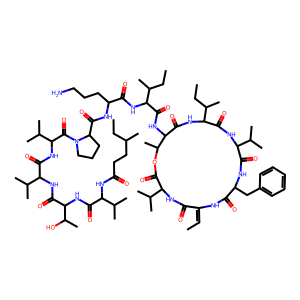

________retival #2, cosine similarity to prediction: 0.8491761088371277_________________
________retival's   cosine similarity to ground truth:  0.8705949783325195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name 9898671


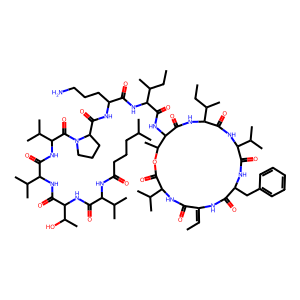

(['CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O',
  'CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O'],
 ['"(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrolidine-2-carboxamide"',
  '9898671'])

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B2"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=False, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=2, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")

In [ ]:

fp_loader.total_entropy_of_all_bits, fp_loader.indices_kept

AttributeError: 'DB_Specific_FP_loader' object has no attribute 'total_entropy_of_all_bits'

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B1"
# inputs, NMR_type_indicator = build_input(compound_dir,
#                      mode=mode,
#                      include_h_nmr=False, include_c_nmr=False
#                      )
# show_topK(inputs, k=3)

investigate_new_molecule(compound_dir, None)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B2"


investigate_new_molecule(compound_dir, None)